In [1]:
import torch
from torch import nn
from tqdm import trange
import numpy as np
import pandas as pd

### load data

In [2]:
x = torch.load('/content/drive/MyDrive/Colab Notebooks/x').cuda()
y = torch.load('/content/drive/MyDrive/Colab Notebooks/y').cuda()
print(y.size())

torch.Size([2925874, 3])


In [3]:
import simpletorch
from matplotlib import pyplot as plt
from simpletorch import crossEntropyLossMultiTarget
from simpletorch import toTensorF, toTensorL

xtn, ytn, xtt, ytt = simpletorch.chooseTrainTest(x, y)



In [55]:
model = torch.nn.Sequential(nn.Linear(45, 128),
                            nn.ReLU(),
                            nn.Linear(128, 128),
                            nn.ReLU(),
                            nn.Linear(128, 128),
                            nn.ReLU(),
                            nn.Linear(128, 128),
                            nn.ReLU(),
                            nn.Linear(128, 128),
                            nn.ReLU(),
                            nn.Linear(128, 128),
                            nn.ReLU(),
                            nn.Linear(128, 128),
                            nn.ReLU(),
                            nn.Linear(128, 11))


lossUse = crossEntropyLossMultiTarget([[0, 2], [2, 5], [5, 11]])
model=model.cuda()
# 
# model = simpletorch.loadModel(model, '/content/drive/MyDrive/Colab Notebooks/model')

print(sum(p.numel() for p in model.parameters()))

106379


## training

In [67]:
l = simpletorch.training(model, xtn, ytn,
                         batchSize=1024*32,
                         showBatchProcess=True,
                         lossUse=lossUse,
                         learningRate=.1, 
                         numSteps=10, 
                         numStepsPerBatch=10)

10/10: 100%|██████████| 81/81 [00:36<00:00,  2.21it/s]


train loss 0.15655375914073286 mean 0.15757368568468977
test {'loss': 0.16644546389579773, 'probTrue': 0.8636376261711121, 'avgScore': 0.8466631770133972}


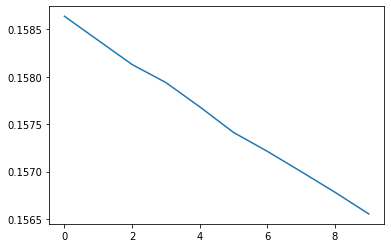

In [68]:
with torch.no_grad():
  print('train loss', l[-1], 'mean', simpletorch.mean(np.array(l)))
  print('test',simpletorch.testingWithCrossEntropyLossMultiTarget(
    model, xtt, ytt, [[0, 2], [2, 5], [5, 11]]))
  plt.plot(l)

In [70]:
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/model')